In [1]:
import scipy.fft as spfft
import matplotlib.pyplot as plt
import numpy as np


Define fft routine

In [96]:
def fft(samples, fs, N=None, scale=None, ax=None):
    if N == None:
        N = len(samples)
    if scale is not None:
        samps_fft = scale*spfft.fft(samples, n=N)
    else:
        samps_fft = spfft.fft(samples, n=N)
    freqs = spfft.fftshift(spfft.fftfreq(samples.size, d=1/fs))
    samps_fft = spfft.fftshift(samps_fft)
    samps_fft_mag = np.absolute(samps_fft)
    fft_dict = {'fft': samps_fft, 'fft_mags': samps_fft_mag,
                'freqs': freqs}
    if ax is None:
        fft_fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(fft_dict['freqs'], fft_dict['fft_mags'])
    ax.set_title('Sample FFT')
    ax.set_xlabel('Frequency (Hz.)')
    return fft_dict

Generate toy signal

In [101]:
fs = 100
t = np.arange(0,1,1/fs)
f1 = 1
f2 = 5
sig = np.cos(2*np.pi*t*f1) + 0.5*np.sin(2*np.pi*t*f2)

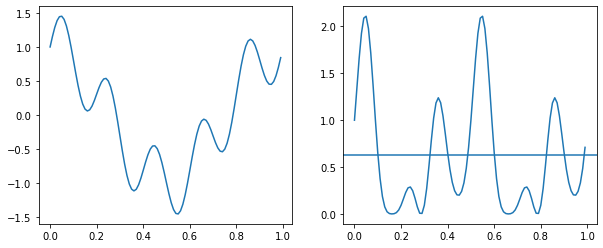

In [102]:
pr = 100 #plot range
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(t, sig)
ax[1].plot(t,sig**2)
ax[1].axhline(np.mean(sig**2))

Text(0.5, 1.0, 'Sample Power Spectral Density')

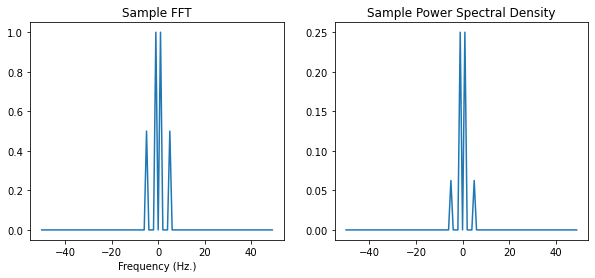

In [111]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sig_fft = fft(sig, fs, scale=2/len(sig), ax=axs[0])
sig_fft_psd = (1/4)*sig_fft['fft_mags']**2
axs[1].plot(sig_fft['freqs'], sig_fft_psd)
axs[1].set_title('Sample Power Spectral Density')

In [112]:
np.mean(sig**2)

0.6250000000000001

In [113]:
np.sum(sig_fft_psd)

0.6250000000000002